<h1><center>Proyecto CDIN (Airbnb)</center></h1>

<h2><center>Ciencia de Datos e Inteligencia de Negocios</center></h2>

<h2><center>Integrantes:</center></h2>

<center>Gustavo de Anda</center>
    
<center>Sebastián Castañeda</center>
    
<center>Daniel Sánchez</center>

## Lista de Contenidos (Workflow)

1.- DQR

2.- Limpieza de Datos y EDA

3.- Análisis de similitud

4.- Clustering (hierarchical clustering ó Kmeans)

5.- Conclusiones

## Descripción del proyecto

Los datos que se proporcionaron para este proyecto son datos de AirBnb de Estados Unidos, que contienen una gran cantidad de información, en general, tenemos datos sobre residencias, ubicación de las residencias, disponibilidad, precios de hospedaje, reseñas sobre lugares etc.

En base al análisis de los datos se va a determinar el enfoque del análisis de los datos, así como los datos que se van a utilizar y los datos que se van a eliminar, debido a que el dataset contiene mucha información, pero no toda la información es pertinente para los fines de este proyecto.

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from CDIN import CDIN as cd

## Data Quality Report (DQR)

Se importa el dataset, y se visualiza. También se van a analizar las características de los datos, así como la obtención de los tipos de columnas que contiene el dataset (categóricas, numéricas, binarias). En base a esto tendremos una mejor comprensión de la información que cada tipo de datos nos proporciona.

In [2]:
data = pd.read_csv('../Data/Airbnb_Data_sample.csv')
data

,Unnamed: 0,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
1,72587,41091136,Central Park west. Big Cozy Room,19388079471,unconfirmed,Fernando,Manhattan,Upper West Side,40.79927,-73.96235,...,$142,1.0,87.0,6/22/2019,1.88,4.0,2.0,263.0,NaN,NaN
2,21781,13030982,❤ of Manhattan | Fantastic 1 Bedroom,43427426473,unconfirmed,Kyle,Manhattan,Theater District,40.76321,-73.98356,...,$196,30.0,0.0,NaN,NaN,4.0,23.0,364.0,"We live on the 3rd floor of a 3-family house, ...",NaN
3,45621,26197814,阳台大双人房 (queens size room with balcony ),27298749852,unconfirmed,Li,Queens,Flushing,40.76316,-73.80869,...,$205,1.0,0.0,NaN,NaN,2.0,7.0,329.0,There is light breakfast - cereal with milk t...,NaN
4,24727,14658058,"Cozy, Bright, Bohemian Space in the East Village",49124834493,verified,Michael,Manhattan,East Village,40.73022,-73.98623,...,$62,5.0,2.0,8/27/2017,0.08,3.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5126,43075,24791659,HOTEL ROOM LIKE “L”\nAFFORDABLE PRICE,42820982123,verified,Viviana,Queens,Woodhaven,40.68727,-73.86413,...,$139,3.0,4.0,5/31/2019,1.88,3.0,9.0,361.0,"To enjoy, relax, feel safe and cozy. Also, kee...",NaN
5127,28175,16562389,Luxury 1B1B Apt with City View @ Columbia U,37971970127,verified,Yuanwen,Manhattan,Morningside Heights,40.80485,-73.96345,...,$114,3.0,1.0,12/14/2017,0.05,3.0,1.0,0.0,Some general information about the apartment. ...,NaN
5128,40133,23166792,Beautiful Modern Lower East Side Apartment!,11523190081,unconfirmed,Katie,Manhattan,Lower East Side,40.72176,-73.99218,...,$122,2.0,18.0,7/6/2019,2.92,4.0,1.0,16.0,"No smoking, no pets, no parties please. Respec...",NaN
5129,70608,39998134,Stylish apt in the heart of NYC!,12517661682,verified,Nim,Manhattan,Midtown,40.75099,-73.96994,...,$33,1.0,7.0,4/12/2019,0.10,4.0,1.0,358.0,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5131 entries, 0 to 5130
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      5131 non-null   int64  
 1   id                              5131 non-null   int64  
 2   NAME                            5121 non-null   object 
 3   host id                         5131 non-null   int64  
 4   host_identity_verified          5117 non-null   object 
 5   host name                       5113 non-null   object 
 6   neighbourhood group             5128 non-null   object 
 7   neighbourhood                   5129 non-null   object 
 8   lat                             5129 non-null   float64
 9   long                            5129 non-null   float64
 10  country                         5110 non-null   object 
 11  country code                    5126 non-null   object 
 12  instant_bookable                51

In [4]:
data_dqr = cd.dqr(data)
data_dqr

,Nombre_Columnas,Tipo_Datos,Valores_Presentes,Valores_Faltantes,Valores_Unicos,Is_Categorical,Categories,Max_Values,Min_Values,Mean,Std
Unnamed: 0,Unnamed: 0,int64,5131,0,5131,No aplica,NaN,1.025940e+05,4.000000e+00,5.148845e+04,2.953216e+04
id,id,int64,5131,0,5130,No aplica,NaN,5.736024e+07,1.003689e+06,2.925144e+07,1.621959e+07
NAME,NAME,object,5121,10,4970,True,NaN,NaN,NaN,NaN,NaN
host id,host id,int64,5131,0,5130,No aplica,NaN,9.875557e+10,1.297566e+08,4.990370e+10,2.872007e+10
host_identity_verified,host_identity_verified,object,5117,14,2,True,"[verified, unconfirmed, nan]",NaN,NaN,NaN,NaN
host name,host name,object,5113,18,2547,True,NaN,NaN,NaN,NaN,NaN
neighbourhood group,neighbourhood group,object,5128,3,5,True,"[Manhattan, Queens, Brooklyn, Bronx, Staten Is...",NaN,NaN,NaN,NaN
neighbourhood,neighbourhood,object,5129,2,192,True,NaN,NaN,NaN,NaN,NaN
lat,lat,float64,5129,2,4409,No aplica,NaN,4.091169e+01,4.052700e+01,4.072900e+01,5.600000e-02
long,long,float64,5129,2,4116,No aplica,NaN,-7.371795e+01,-7.420941e+01,-7.394900e+01,5.100000e-02


In [6]:
# Obtención de los tipos de columnas
cd.categorize_columns(data)

Columnas Categóricas (Nominales):
['NAME', 'host name', 'neighbourhood group', 'neighbourhood', 'country', 'country code', 'cancellation_policy', 'room type', 'price', 'service fee', 'last review', 'house_rules']

Columnas Categóricas (Ordinales):
[]

Columnas Continuas:
['Unnamed: 0', 'id', 'host id', 'lat', 'long', 'Construction year', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'license']

Columnas Binarias:
['host_identity_verified', 'instant_bookable']


Después de realizar el Reporte de Calidad del dataset, nos damos cuenta que la gran mayoría de datos son datso categóricos y datos numéricos. A simple vista observamos que vamos a tener que cambiar los datos de precios **"price"** a tipo numérico, consideramos que no nos será útil que esta información tenga la calidad de categóricos porque no nos va a proporcionar información útil.

Columnas que consideramos útiles:
> - Price
> - Number of reviews
> - Neighbourhood
> - Neighbourhood group
> - Room type
> - Name
> - Availability 365
> - Lattitude
> - Longitude

In [29]:
data['country code'].value_counts()

US    5126
Name: country code, dtype: int64

In [28]:
data['country'].unique

<bound method Series.unique of 0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
5126    United States
5127    United States
5128    United States
5129    United States
5130    United States
Name: country, Length: 5131, dtype: object>

## Exploratory Data Analysis (EDA)

In [30]:
keep_columns = ['price', 'number of reviews', 'neighbourhood', 'neighbourhood group', 'room type', 'NAME', 'availability 365', 
                'lat', 'long']

data_airbnb = data[keep_columns]
data_airbnb

,price,number of reviews,neighbourhood,neighbourhood group,room type,NAME,availability 365,lat,long
0,$204,9.0,East Harlem,Manhattan,Entire home/apt,Entire Apt: Spacious Studio/Loft by central park,289.0,40.79851,-73.94399
1,$709,87.0,Upper West Side,Manhattan,Private room,Central Park west. Big Cozy Room,263.0,40.79927,-73.96235
2,$981,0.0,Theater District,Manhattan,Entire home/apt,❤ of Manhattan | Fantastic 1 Bedroom,364.0,40.76321,-73.98356
3,"$1,026",0.0,Flushing,Queens,Private room,阳台大双人房 (queens size room with balcony ),329.0,40.76316,-73.80869
4,$310,2.0,East Village,Manhattan,Entire home/apt,"Cozy, Bright, Bohemian Space in the East Village",0.0,40.73022,-73.98623
...,...,...,...,...,...,...,...,...,...
5126,$697,4.0,Woodhaven,Queens,Private room,HOTEL ROOM LIKE “L”\nAFFORDABLE PRICE,361.0,40.68727,-73.86413
5127,$569,1.0,Morningside Heights,Manhattan,Entire home/apt,Luxury 1B1B Apt with City View @ Columbia U,0.0,40.80485,-73.96345
5128,$609,18.0,Lower East Side,Manhattan,Entire home/apt,Beautiful Modern Lower East Side Apartment!,16.0,40.72176,-73.99218
5129,$167,7.0,Midtown,Manhattan,Entire home/apt,Stylish apt in the heart of NYC!,358.0,40.75099,-73.96994


De aquí en adelante **"data_airbnb"** será nuestro dataset para trabajar a lo largo del proyecto, aunque todavía está sujeto a posibles cambios si es necesario.

Vamos a volver a realizar un Reporte de Calidad de Datos sobre este nuevo dataset, para poder visualizar las características de los datos que nos interesan.

In [31]:
data_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5131 entries, 0 to 5130
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                5124 non-null   object 
 1   number of reviews    5121 non-null   float64
 2   neighbourhood        5129 non-null   object 
 3   neighbourhood group  5128 non-null   object 
 4   room type            5131 non-null   object 
 5   NAME                 5121 non-null   object 
 6   availability 365     5107 non-null   float64
 7   lat                  5129 non-null   float64
 8   long                 5129 non-null   float64
dtypes: float64(4), object(5)
memory usage: 360.9+ KB


In [32]:
data_airbnb_dqr = cd.dqr(data_airbnb)
data_airbnb_dqr

,Nombre_Columnas,Tipo_Datos,Valores_Presentes,Valores_Faltantes,Valores_Unicos,Is_Categorical,Categories,Max_Values,Min_Values,Mean,Std
price,price,object,5124,7,1133,True,NaN,NaN,NaN,NaN,NaN
number of reviews,number of reviews,float64,5121,10,254,No aplica,NaN,629.00000,0.00000,26.831,47.561
neighbourhood,neighbourhood,object,5129,2,192,True,NaN,NaN,NaN,NaN,NaN
neighbourhood group,neighbourhood group,object,5128,3,5,True,"[Manhattan, Queens, Brooklyn, Bronx, Staten Is...",NaN,NaN,NaN,NaN
room type,room type,object,5131,0,4,True,"[Entire home/apt, Private room, Shared room, H...",NaN,NaN,NaN,NaN
NAME,NAME,object,5121,10,4970,True,NaN,NaN,NaN,NaN,NaN
availability 365,availability 365,float64,5107,24,432,No aplica,NaN,3677.00000,-9.00000,142.964,144.889
lat,lat,float64,5129,2,4409,No aplica,NaN,40.91169,40.52700,40.729,0.056
long,long,float64,5129,2,4116,No aplica,NaN,-73.71795,-74.20941,-73.949,0.051


In [33]:
cd.categorize_columns(data_airbnb)

Columnas Categóricas (Nominales):
['price', 'neighbourhood', 'neighbourhood group', 'room type', 'NAME']

Columnas Categóricas (Ordinales):
[]

Columnas Continuas:
['number of reviews', 'availability 365', 'lat', 'long']

Columnas Binarias:
[]


Continuamos con la limpieza de datos. Primero identificamos que es necesario convertir los datos de Price a valores numéricos. Pero consideramos que el resto de los datos no necesitan limpieza, a lo mejor la columna de Name podría necesitar una limpieza para eliminar caracteres especiales, pero sería para darle mejor formato al momento de presentar la información.

In [35]:
data_airbnb['price'] = data_airbnb['price'].str.replace('[\$,]', '', regex=True).astype(float)
data_airbnb

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4760\1890779793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_airbnb['price'] = data_airbnb['price'].str.replace('[\$,]', '', regex=True).astype(float)


,price,number of reviews,neighbourhood,neighbourhood group,room type,NAME,availability 365,lat,long
0,204.0,9.0,East Harlem,Manhattan,Entire home/apt,Entire Apt: Spacious Studio/Loft by central park,289.0,40.79851,-73.94399
1,709.0,87.0,Upper West Side,Manhattan,Private room,Central Park west. Big Cozy Room,263.0,40.79927,-73.96235
2,981.0,0.0,Theater District,Manhattan,Entire home/apt,❤ of Manhattan | Fantastic 1 Bedroom,364.0,40.76321,-73.98356
3,1026.0,0.0,Flushing,Queens,Private room,阳台大双人房 (queens size room with balcony ),329.0,40.76316,-73.80869
4,310.0,2.0,East Village,Manhattan,Entire home/apt,"Cozy, Bright, Bohemian Space in the East Village",0.0,40.73022,-73.98623
...,...,...,...,...,...,...,...,...,...
5126,697.0,4.0,Woodhaven,Queens,Private room,HOTEL ROOM LIKE “L”\nAFFORDABLE PRICE,361.0,40.68727,-73.86413
5127,569.0,1.0,Morningside Heights,Manhattan,Entire home/apt,Luxury 1B1B Apt with City View @ Columbia U,0.0,40.80485,-73.96345
5128,609.0,18.0,Lower East Side,Manhattan,Entire home/apt,Beautiful Modern Lower East Side Apartment!,16.0,40.72176,-73.99218
5129,167.0,7.0,Midtown,Manhattan,Entire home/apt,Stylish apt in the heart of NYC!,358.0,40.75099,-73.96994


In [51]:
data_airbnb['neighbourhood group'].value_counts()

Manhattan        2195
Brooklyn         2082
Queens            664
Bronx             134
Staten Island      53
Name: neighbourhood group, dtype: int64

In [38]:
dqr_airbnb = cd.dqr(data_airbnb)
dqr_airbnb

,Nombre_Columnas,Tipo_Datos,Valores_Presentes,Valores_Faltantes,Valores_Unicos,Is_Categorical,Categories,Max_Values,Min_Values,Mean,Std
price,price,float64,5124,7,1133,No aplica,NaN,1200.00000,50.00000,623.063,333.502
number of reviews,number of reviews,float64,5121,10,254,No aplica,NaN,629.00000,0.00000,26.831,47.561
neighbourhood,neighbourhood,object,5129,2,192,True,NaN,NaN,NaN,NaN,NaN
neighbourhood group,neighbourhood group,object,5128,3,5,True,"[Manhattan, Queens, Brooklyn, Bronx, Staten Is...",NaN,NaN,NaN,NaN
room type,room type,object,5131,0,4,True,"[Entire home/apt, Private room, Shared room, H...",NaN,NaN,NaN,NaN
NAME,NAME,object,5121,10,4970,True,NaN,NaN,NaN,NaN,NaN
availability 365,availability 365,float64,5107,24,432,No aplica,NaN,3677.00000,-9.00000,142.964,144.889
lat,lat,float64,5129,2,4409,No aplica,NaN,40.91169,40.52700,40.729,0.056
long,long,float64,5129,2,4116,No aplica,NaN,-73.71795,-74.20941,-73.949,0.051


Una vez terminada la limpieza, continuamos a realizar un análisis Exploratorio de Datos. Ya contamos con varios insights con tan solo visualizar el Reporte de Calidad de Datos, pero a continuación vamos a proporcionar un análisis un poco más detallado.

In [39]:
data_airbnb.shape[0]

5131

## Histograma de precios y número de reseñas

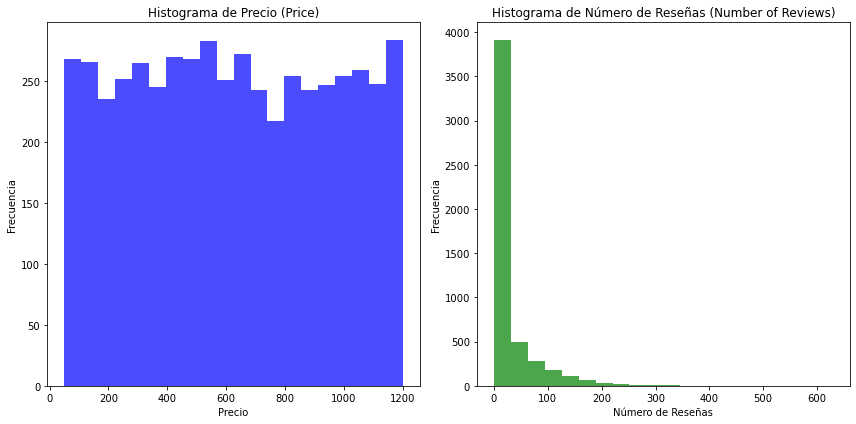

In [40]:
plt.figure(figsize=(12, 6))

# Histograma de 'price'
plt.subplot(1, 2, 1)
plt.hist(data_airbnb['price'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma de Precio (Price)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Histograma de 'number of reviews'
plt.subplot(1, 2, 2)
plt.hist(data_airbnb['number of reviews'], bins=20, color='green', alpha=0.7)
plt.title('Histograma de Número de Reseñas (Number of Reviews)')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## Boxplots para identificar valores atípicos

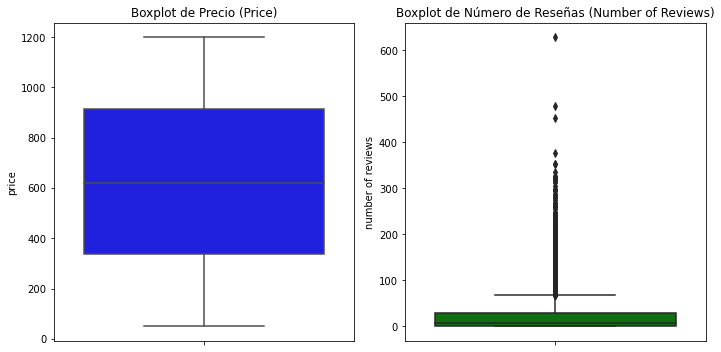

In [41]:
import seaborn as sns

plt.figure(figsize=(10, 5))

# Boxplot de 'price'
plt.subplot(1, 2, 1)
sns.boxplot(data=data_airbnb, y='price', color='blue')
plt.title('Boxplot de Precio (Price)')

# Boxplot de 'number of reviews'
plt.subplot(1, 2, 2)
sns.boxplot(data=data_airbnb, y='number of reviews', color='green')
plt.title('Boxplot de Número de Reseñas (Number of Reviews)')

plt.tight_layout()
plt.show()

## Diagramas de dispersión

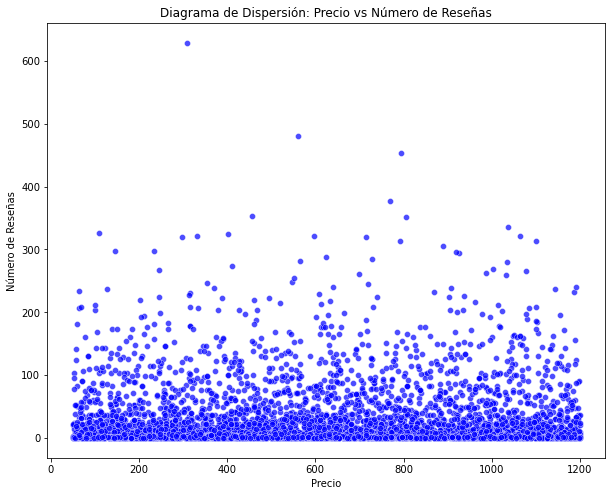

In [43]:
plt.figure(figsize=(10, 8))

# Diagrama de dispersión de 'price' vs 'number of reviews'
sns.scatterplot(data=data_airbnb, x='price', y='number of reviews', alpha=0.7, color='blue')
plt.title('Diagrama de Dispersión: Precio vs Número de Reseñas')
plt.xlabel('Precio')
plt.ylabel('Número de Reseñas')

plt.show()

## Gráficos de barra

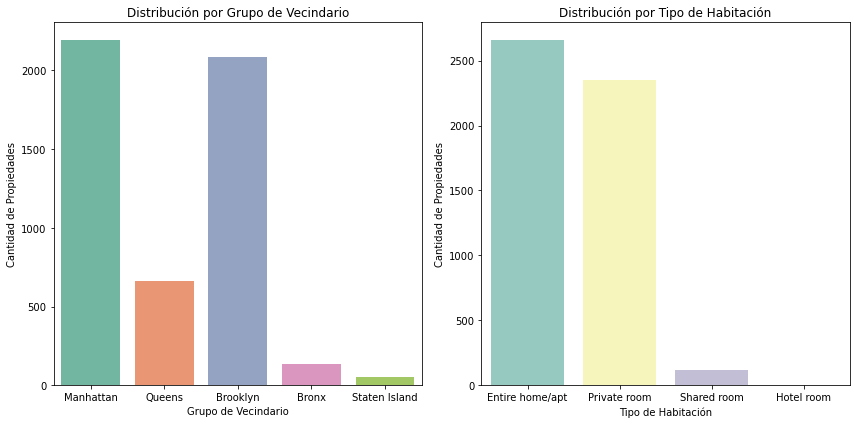

In [44]:
plt.figure(figsize=(12, 6))

# Gráfico de barras para 'neighbourhood group'
plt.subplot(1, 2, 1)  # Crear un subgráfico en la posición 1
sns.countplot(data=data_airbnb, x='neighbourhood group', palette='Set2')
plt.title('Distribución por Grupo de Vecindario')
plt.xlabel('Grupo de Vecindario')
plt.ylabel('Cantidad de Propiedades')

# Gráfico de barras para 'room type'
plt.subplot(1, 2, 2)  # Crear un subgráfico en la posición 2
sns.countplot(data=data_airbnb, x='room type', palette='Set3')
plt.title('Distribución por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Cantidad de Propiedades')

plt.tight_layout()
plt.show()

## Dispersión de las coordenadas

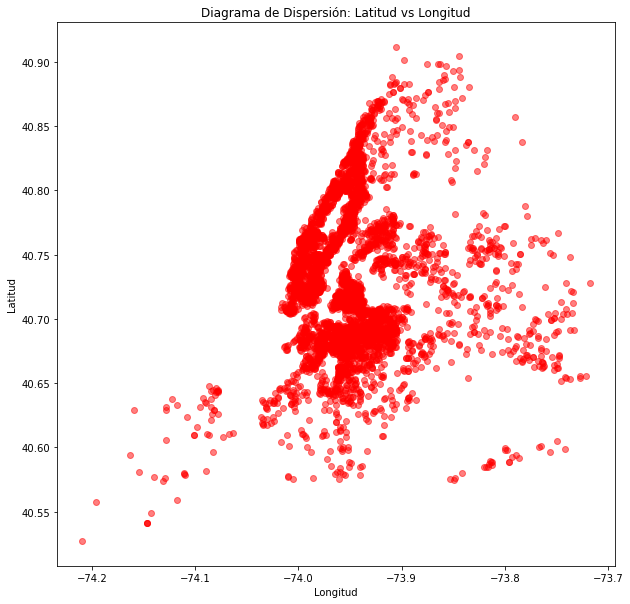

In [45]:
plt.figure(figsize=(10, 10))

# Diagrama de dispersión de 'lat' vs 'long'
plt.scatter(data_airbnb['long'], data_airbnb['lat'], alpha=0.5, color='red')
plt.title('Diagrama de Dispersión: Latitud vs Longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()

## Medidas de similitud

In [46]:
data_airbnb

,price,number of reviews,neighbourhood,neighbourhood group,room type,NAME,availability 365,lat,long
0,204.0,9.0,East Harlem,Manhattan,Entire home/apt,Entire Apt: Spacious Studio/Loft by central park,289.0,40.79851,-73.94399
1,709.0,87.0,Upper West Side,Manhattan,Private room,Central Park west. Big Cozy Room,263.0,40.79927,-73.96235
2,981.0,0.0,Theater District,Manhattan,Entire home/apt,❤ of Manhattan | Fantastic 1 Bedroom,364.0,40.76321,-73.98356
3,1026.0,0.0,Flushing,Queens,Private room,阳台大双人房 (queens size room with balcony ),329.0,40.76316,-73.80869
4,310.0,2.0,East Village,Manhattan,Entire home/apt,"Cozy, Bright, Bohemian Space in the East Village",0.0,40.73022,-73.98623
...,...,...,...,...,...,...,...,...,...
5126,697.0,4.0,Woodhaven,Queens,Private room,HOTEL ROOM LIKE “L”\nAFFORDABLE PRICE,361.0,40.68727,-73.86413
5127,569.0,1.0,Morningside Heights,Manhattan,Entire home/apt,Luxury 1B1B Apt with City View @ Columbia U,0.0,40.80485,-73.96345
5128,609.0,18.0,Lower East Side,Manhattan,Entire home/apt,Beautiful Modern Lower East Side Apartment!,16.0,40.72176,-73.99218
5129,167.0,7.0,Midtown,Manhattan,Entire home/apt,Stylish apt in the heart of NYC!,358.0,40.75099,-73.96994


Para realizar medidas de similitud, necesitamos establecer ciertas variables que creemos que sea útil conocer su similitud.

> - Similitud entre el número de reseñas con el vecindario y el tipo de cuarto.
> - Disponibilidad con el precio
> - Nombres de Airbnbs con el tipo de cuartos / vecindario
> - 

## Clustering y Kmeans